In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Beginning the SVM chapter here
# First up, is a demonstration of how some linear classifiers separate the data with very less margin
# In contrast, SVMs classify data keeping a clean margin between the separated classes
# SVC refers to Support Vector Classifier

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris() # loading IRIS dataset used previously

X = iris["data"][:, (2, 3)] # Create training set out of only petal length and petal width for 150 training samples
y = iris["target"] # Create test set out of target values

setosa_or_versicolor = (y == 0) | (y == 1) # Create an array of 'True' & 'False' values for 100 setosa or versicolour flowers
X = X[setosa_or_versicolor] # Filter the training set X to keep only setosa and versicolour features in X
y = y[setosa_or_versicolor] # The same to target values in y

# Creation of training and target values are complete here.
# Now apply SVM classifier of this data.
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Trying out a few commands to check their functions
print(svm_clf.coef_[0])
print(svm_clf.intercept_)
print(svm_clf.support_vectors_)

x0 = np.linspace(0, 5.5, 200)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
X[:, 0][y==1]

[1.29411744 0.82352928]
[-3.78823471]
[[1.9 0.4]
 [3.  1.1]]


array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

Saving figure large_margin_classification_plot


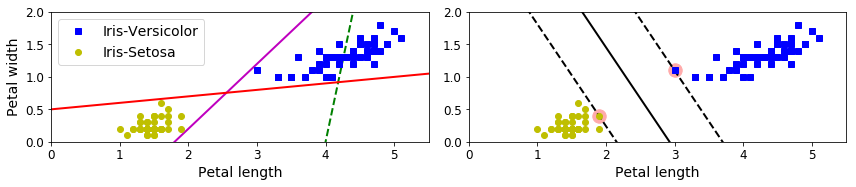

In [3]:
# Examples of bad linear SVM classifiers
x0 = np.linspace(0, 5.5, 200)  # Generate 200 numbers between 0 and 5.5

# Three straight lines
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# Function to plot the SVM decision boundaries
# xmin and xmax are easily found here because the training values are generated by the developer
# Normally we have to find the minimum and maximum values of the training data
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # svm_clf.coef_ attribute is an array which contains two coefficients for the features in training set. 
    
    # Using [0] for w makes it store the array of coefficients
    w = svm_clf.coef_[0]
    # Using [0] for b makes it store only the value and not the entire array
    b = svm_clf.intercept_[0] 
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1 - computes values of x1 for values of x0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] # This is an example of a vectorized implementation
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # support_vectors_ attribute stores the support vectors for this classifier
    # Support vectors are the borderline cases which are on the gutter-up or gutter-down lines
    svs = svm_clf.support_vectors_ 
    
    # These plots draw the skeleton of the SVM curve
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.figure(figsize=(12,2.7)) # dimensions of the complete figure

# Hardcoded subplot using the predefined straight line equations at the start of the cell
plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
#plot all values in the first column of array X (X[:, 0]), which satisfies y==1
#plot all values in the second column of array X (X[:, 1]), which satisfies y==1
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Calls the SVC decision boundary function to plot curve for SVM
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


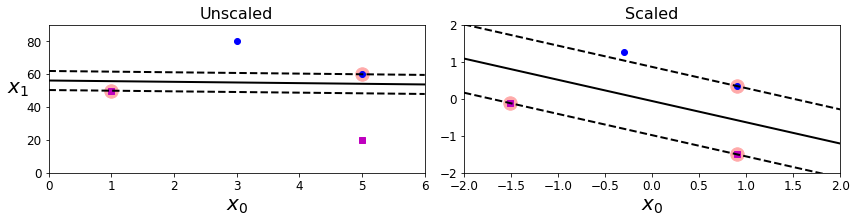

In [4]:
# Sensitivity of SVMs to feature scaling

# Create a training set where one value is much larger than the other
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Train a SVM classifier on the data created above
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# Plot the above output on a curve
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Scale the data to make them comparable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# Plot the results using the scaled data
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

Saving figure sensitivity_to_outliers_plot


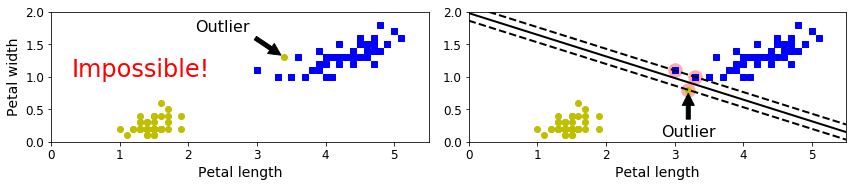

In [5]:
# Sensitivity of SVM to outliers

# Generate some outliers
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# The four lines below create the training data with the outliers to test the SVM classifier
# X_outliers[:1] chooses all rows until index 1. axis = 0 makes sure that the outlier values are added as a new row to X.
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Fit the SVM classifier to the Xo2 yo2 set
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

# Plot the first curve with outliers. 
plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# Plot the curve for the results with SVM classifier in place
# The decision booundary in this case is very different from the earlier decision boundary.
# the single outlier here skews the decision boundary
plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

In [14]:
svm_clf2.support_vectors_

array([[4.9, 1.5],
       [4.8, 1.8],
       [4.9, 1.5],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.7],
       [5. , 1.5],
       [4.8, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8]])

In [6]:
# This section shows how tweaking the C value can change decision boundaries

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [15]:
svm_clf.predict([[5.5, 1.7]]) # This classifies as an Iris-Virginica

array([1.])

In [8]:
# Generate graph containing different C values
scaler = StandardScaler()

svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [9]:
print(scaler.mean_) # Mean value for each feature in the training set
print(scaler.scale_) # Per feature relative scaling of the data

[3.758      1.19933333]
[1.75940407 0.75969263]


In [10]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

array([[0.92832758, 3.14321201]])

In [12]:
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
# Find support vectors (LinearSVC does not do this automatically in this case. It is a Pipeline object)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


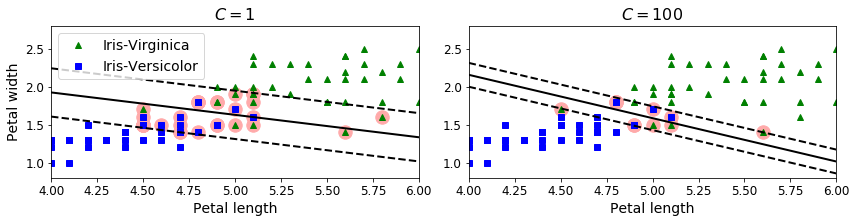

In [16]:
# The plots show that increasing C results in a narrower decision boundary.
# Some instances may be misclassified and some instances are correctly classified but inside the decision boundary line.
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

save_fig("regularization_plot")